In [63]:
pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
pip install scikit-learn

     ---------------------------------------- 7.1/7.1 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
pip install category_encoders

     ---------------------------------------- 81.2/81.2 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing modules

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Reading train and test data from given csv files

data_train = pd.read_csv('application_train.csv')
data_test = pd.read_csv('application_test.csv')

# Exploratory Data Analysis

First let's see the size of the given datasets and sample some of the rows from it to get the gerenal idea of what's stored in there. We can see from the result that train dataset has 307511 entries with 122 attributes, while test dataset has 48744 attributes with 121 attributes (feature TARGET is present in the train dataset, but not present in the test dataset).

In [3]:
print (data_train.shape)
data_train.sample(5)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
27088,131485,0,Cash loans,F,N,N,0,135000.0,254700.0,13068.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,6.0
207124,340075,0,Cash loans,F,N,Y,0,180000.0,261000.0,27405.0,...,0,0,0,0,0.0,0.0,1.0,0.0,1.0,3.0
29955,134774,0,Cash loans,F,N,Y,0,135000.0,942300.0,30528.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
128133,248624,0,Cash loans,F,N,Y,0,157500.0,769500.0,32602.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
130581,251458,1,Cash loans,M,N,Y,0,81000.0,270000.0,21024.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
print (data_test.shape)
data_test.sample(5)

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
32679,338022,Cash loans,M,Y,Y,1,193500.0,1138500.0,48366.0,1138500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
22281,261968,Cash loans,F,Y,N,0,36000.0,135000.0,7749.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
46399,439205,Cash loans,F,Y,Y,0,202500.0,509400.0,32683.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2275,116015,Cash loans,F,N,Y,0,135000.0,484861.5,35410.5,396000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40957,401415,Cash loans,M,N,Y,1,225000.0,541323.0,27769.5,405000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0


## Handling Types of Features

First let's see what datatypes we have in the provided dataset. We can identify some categorical values right away, because they have object type. But we can't really identify all of them right now, because categorical values can be represented as numbers. For that reason I'm just going to identify caterogical values of type object and leave out everything else for now.

In [5]:
data_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [4]:
categorical_features = []

for column in data_train.columns:
    if (data_train[column].dtype == 'object'):
        categorical_features.append(column)

## Missing values

Let's find the number of rows that contain at least one missing value. To do that, I'm going to use pandas isnull method to check whether some value is missing. And we can see from the result that 298 909 entries out of 307 511 have at least one missing value for the train dataset, which is a lot, and 47 005 entries out of 48774 have missing values for the test dataset.

In [5]:
# get the total number of rows that contain at least one missing value
total_missing_rows_train = (data_train.isnull().any(axis=1)).sum()
total_missing_rows_test = (data_test.isnull().any(axis=1)).sum()
print(f"Total number of rows with missing values (train): {total_missing_rows_train}")
print(f"Total number of rows with missing values (test): {total_missing_rows_test}")

Total number of rows with missing values (train): 298909
Total number of rows with missing values (test): 47005


In [13]:
data_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [14]:
data_test.isna().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

Now lets investigate categorical variables of type object and see if there are any variables that contain unreal data (like "missing" or "unknown") and manually convert them to NaN.

In [17]:
for column in data_train:
    if data_train[column].dtype == 'O':
        print(f"{column} contains:", data_train[column].unique())
        print("--------------------------------")

NAME_CONTRACT_TYPE contains: ['Cash loans' 'Revolving loans']
--------------------------------
CODE_GENDER contains: ['M' 'F' 'XNA']
--------------------------------
FLAG_OWN_CAR contains: ['N' 'Y']
--------------------------------
FLAG_OWN_REALTY contains: ['Y' 'N']
--------------------------------
NAME_TYPE_SUITE contains: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
--------------------------------
NAME_INCOME_TYPE contains: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
--------------------------------
NAME_EDUCATION_TYPE contains: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
--------------------------------
NAME_FAMILY_STATUS contains: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
--------------------------------
NAME_HOUSING_TYPE contains: ['House / apartm

From the result we can see that there's an "Uknown" value for the "NAME_FAMILY_STATUS" feature, and it might make sense to make it NaN. Let's also calculate the total percentage of missing values for different features and see what we can do about them.

In [6]:
data_train.replace({'Unknown': np.nan}, inplace=True)
data_test.replace({'Unknown': np.nan}, inplace=True)

In [7]:
total_nan = (data_train.isnull().sum() / data_train.shape[0]) * 100
total_nan[total_nan > 0].sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
NAME_FAMILY_STATUS           0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 68, dtype: float64

In [8]:
total_nan_test = (data_test.isnull().sum() / data_test.shape[0]) * 100
total_nan_test[total_nan_test > 0].sort_values(ascending=False)

COMMONAREA_MODE             68.716150
COMMONAREA_AVG              68.716150
COMMONAREA_MEDI             68.716150
NONLIVINGAPARTMENTS_MEDI    68.412523
NONLIVINGAPARTMENTS_AVG     68.412523
                              ...    
DEF_30_CNT_SOCIAL_CIRCLE     0.059495
OBS_60_CNT_SOCIAL_CIRCLE     0.059495
DEF_60_CNT_SOCIAL_CIRCLE     0.059495
AMT_ANNUITY                  0.049237
EXT_SOURCE_2                 0.016412
Length: 64, dtype: float64

Now let's drop all the columns that have, let's say, more than 40% of missing values. After we do this for the train dataset we have to drop the same columns for the test dataset, even though from the results above we can see that test dataset has less columns that have missing values.

In [9]:
data_test.drop(data_test.columns[data_test.isnull().mean()>0.4],axis=1, inplace=True)
data_train.drop(data_train.columns[data_train.isnull().mean()>0.4],axis=1, inplace=True)

In [10]:
data_train.shape

(307511, 73)

In [11]:
data_test.shape

(48744, 72)

Now let's replace the missing values in columns that have less than 15 percent NaN values with their mode for categorical values of type object and mean for everything else. I selected a pretty small percentage here (15 %) so that the resulting model shouldn't not be biased too much towards our data that we are emplacing.

In [12]:
# Categorical values
cat_columns_nan  = [i for i in data_train.columns[(((data_train.isnull().sum() / data_train.shape[0]) * 100) > 0) 
                                                                  & (((data_train.isnull().sum() / data_train.shape[0]) * 100) < 15)] 
                                     if data_train[i].dtype == 'O']

# Numerical values
num_columns_nan  = [i for i in data_train.columns[(((data_train.isnull().sum() / data_train.shape[0]) * 100) > 0) 
                                                                  & (((data_train.isnull().sum() / data_train.shape[0]) * 100) < 15)] 
                                     if data_train[i].dtype != 'O']
# Transformation
for i in cat_columns_nan:
    data_test[i].fillna(data_train[i].mode()[0], inplace=True)
    data_train[i].fillna(data_train[i].mode()[0], inplace=True)

In [126]:
data_train[num_columns_nan].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307499.000000,3.072330e+05,307509.000000,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,27108.573909,5.383962e+05,2.152665,5.143927e-01,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,14493.737315,3.694465e+05,0.910682,1.910602e-01,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,1615.500000,4.050000e+04,1.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16524.000000,2.385000e+05,2.000000,3.924574e-01,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24903.000000,4.500000e+05,2.000000,5.659614e-01,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,34596.000000,6.795000e+05,3.000000,6.636171e-01,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,258025.500000,4.050000e+06,20.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<Figure size 720x720 with 0 Axes>

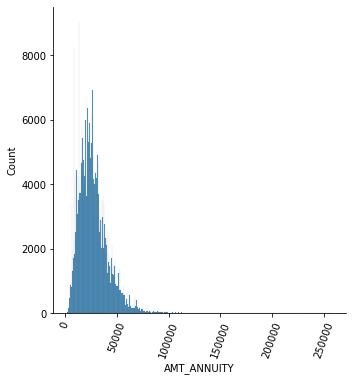

<Figure size 720x720 with 0 Axes>

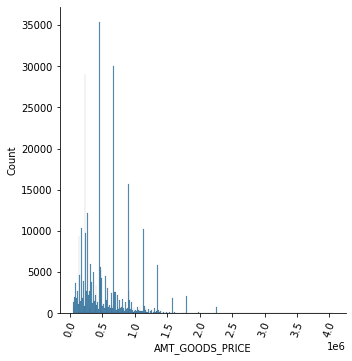

<Figure size 720x720 with 0 Axes>

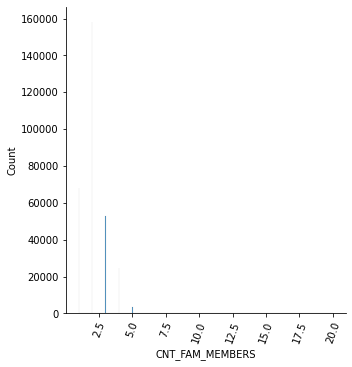

<Figure size 720x720 with 0 Axes>

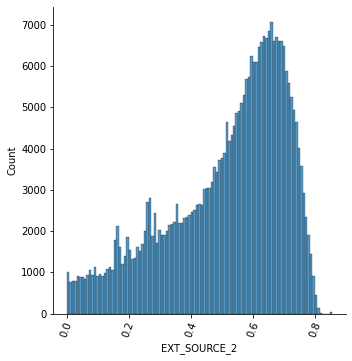

<Figure size 720x720 with 0 Axes>

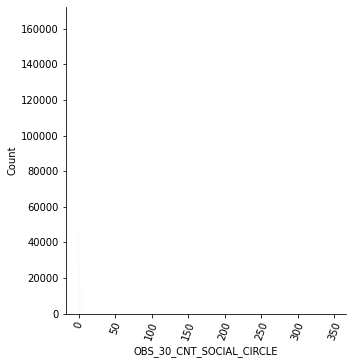

<Figure size 720x720 with 0 Axes>

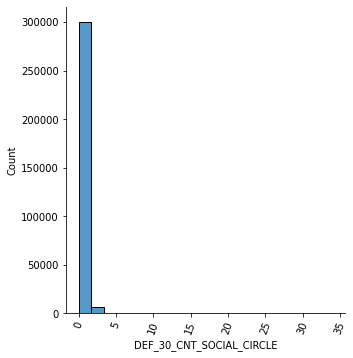

<Figure size 720x720 with 0 Axes>

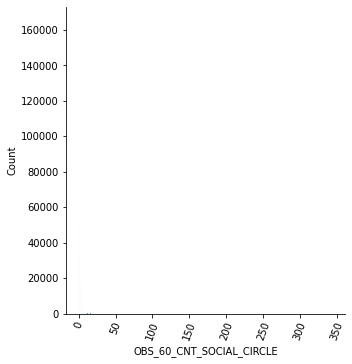

<Figure size 720x720 with 0 Axes>

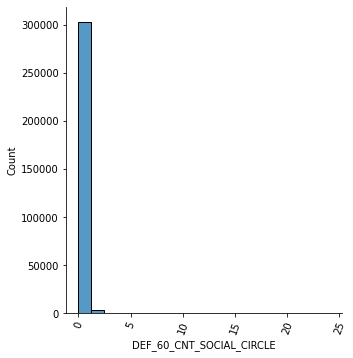

<Figure size 720x720 with 0 Axes>

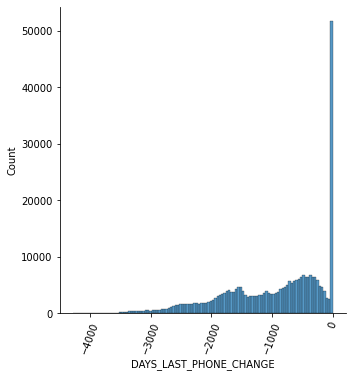

<Figure size 720x720 with 0 Axes>

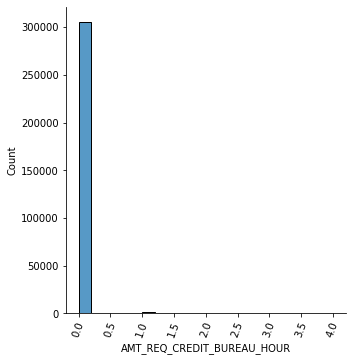

<Figure size 720x720 with 0 Axes>

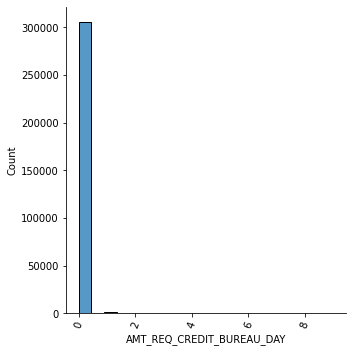

<Figure size 720x720 with 0 Axes>

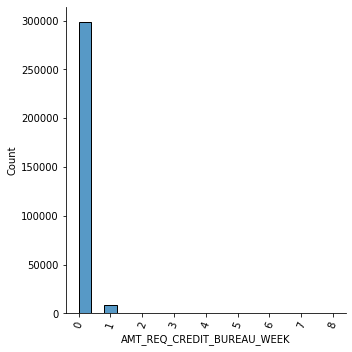

<Figure size 720x720 with 0 Axes>

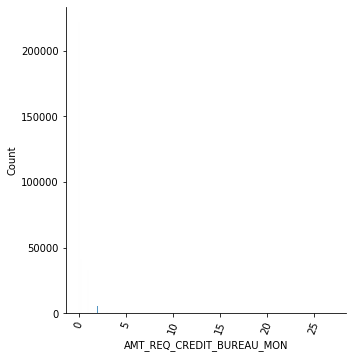

<Figure size 720x720 with 0 Axes>

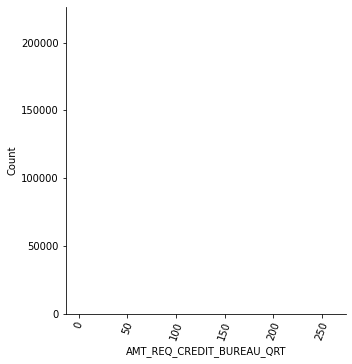

<Figure size 720x720 with 0 Axes>

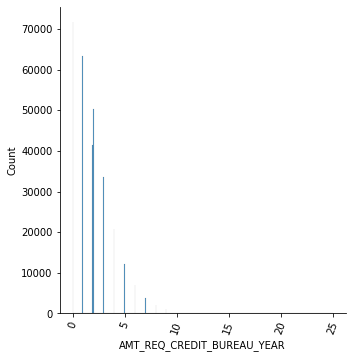

In [53]:
# Plotting some histograms to look for outliers
plt.rcParams['figure.max_open_warning'] = 50
for i in num_columns_nan:
    plt.figure(figsize=(10,10))
    sns.displot(data_train[i])
    plt.xticks(rotation = 70)

In [13]:
for i in num_columns_nan:
    data_test[i].fillna(data_train[i].mean(), inplace=True)
    data_train[i].fillna(data_train[i].mean(), inplace=True)

In [14]:
total_nan = (data_train.isnull().sum() / data_train.shape[0]) * 100
total_nan[total_nan > 0].sort_values(ascending=False)

OCCUPATION_TYPE    31.345545
EXT_SOURCE_3       19.825307
dtype: float64

# Outliers

Next let's investigate whether some features have outliers present. Looking at the histograms above for the numerical and categorical data we can see that some of the features have a skew to the left or right, meaning that they will have outliers. For example, let's look at the boxplot for some of the numerical features:

<AxesSubplot:>

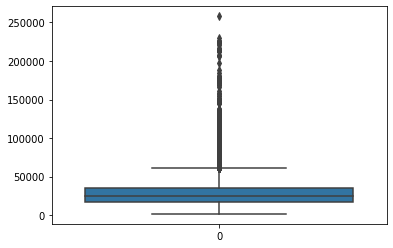

In [18]:
sns.boxplot(data_train['AMT_ANNUITY'])

<AxesSubplot:>

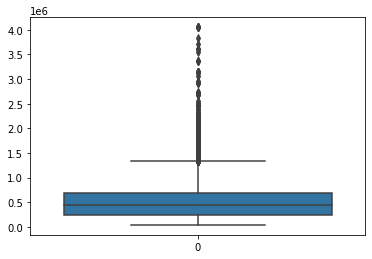

In [19]:
sns.boxplot(data_train['AMT_GOODS_PRICE'])

We can see that a lot of outliers are present for the specified above features.

## Duplicates

Now let's see if we have any duplicates in the provided datasets using the duplicated method. We can see from the given output that neither train nor test datasets contain any duplicates.

In [8]:
data_train.duplicated().sum()

0

In [9]:
data_test.duplicated().sum()

0

## Distributions

The next step is to see some general information about the features in the provided datasets. To include not only numerical but also categorical columns we need to specify additional paramater inlcude='all' in the describe method. From the given characteristics and histogram for the TARGET feature we can see that the distribution for this feature is imbalanced.

In [10]:
data_train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [11]:
data_test.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


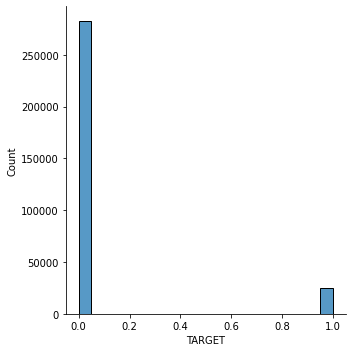

In [12]:
sns.displot(data_train['TARGET'], kde=False)

## Correlations

Let's find the most positive and negative correlations between different feature and the one we should predict (TARGET). From the result below we can see that two variables with the biggest correlation are EXT_SOURCE_3 and EXT_SOURCE_2. The existing correlations between these two variables, DAYS_BIRTH and TARGET are shown on the heatmap below.

In [59]:
correlations = data_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160303
DAYS_EMPLOYED                -0.044932
AMT_GOODS_PRICE              -0.039628
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
FLAG_DOCUMENT_6              -0.028602
HOUR_APPR_PROCESS_START      -0.024166
FLAG_PHONE                   -0.023806
AMT_ANNUITY                  -0.012817
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Correlation heatmap')

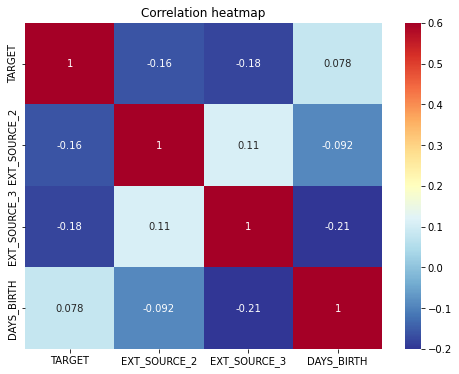

In [60]:
ext_data = data_train[['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

plt.figure(figsize=(8, 6))

# Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.2, annot = True, vmax = 0.6)
plt.title('Correlation heatmap')

From the heatmap above we can see that the correlation between EXT_SOURCE_2, EXT_SOURCE_3 and TARGET is the biggest, meaning that it will have the highest impact on our model.

## Converting categorical data and modeling

In order to create a model for our dataset we need to somehow convert all the categorical fields that are represented as object type to numbers. I will be using OrdinalEncoder to do that. I'm also going to impute the remaining missing values with their median, because RandomForestClassifier of sklearn doesn't handle missing values by default.

In [97]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

In [157]:
cat_column = data_train.select_dtypes('object')

enc = OrdinalEncoder()
data_train[cat_column.columns] = enc.fit_transform(data_train[cat_column.columns])

In [158]:
print(data_test.shape)
data_test[cat_column.columns] = enc.transform(data_test[cat_column.columns])

(48744, 72)


In [160]:
# Setting X and Y values for modeling
X = data_train.drop(columns=['TARGET'])
Y = data_train['TARGET']
X_test = data_test
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X = imputer.fit_transform(X)
X = scaler.fit_transform(X)
X_test = imputer.transform(X_test)
X_test = scaler.transform(X_test)
missing_values = np.isnan(X).sum()

print(f'Total missing values: {missing_values}')
print(X.shape)
print(data_test.shape)

Total missing values: 0
(307511, 72)
(48744, 72)


In [161]:
# Performing train-validation split (80% training and 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.8, stratify=Y, random_state=42)

In [164]:
# Function for trained models evaluation
def evaluate_model(model):
    # prediction
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    
    # probability estimate
    train_pred_proba = model.predict_proba(X_train)
    val_pred_proba = model.predict_proba(X_val)
    test_pred_proba = model.predict_proba(X_test)
    
    
    # evaluations
    print('Training & Validation ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_val, val_pred_proba[:, 1])))
    
    sample_submission = pd.read_csv("sample_submission.csv")
    for i in range(48744):
        sample_submission.iloc[i,1]=test_pred_proba[i,1]
    sample_submission.to_csv('submission.csv', index=False, header=True)  

Now let's see what are the results for one model using this approach. To evaluate the quality of the trained model I will be using ROC_AUC metric (Receiver Operating Characteristic - Area Under the Curve). From the result we can see that this metric is equal to 0.9425 for the training set and 0.7335 for the validation set, which is decent. The closer to 1 this metric is - the better quality our model has.  All that is left to do is to write the predicted values into a CSV file and submit it.

In [165]:
rf = RandomForestClassifier(n_estimators=70, max_depth=15, random_state=42)

rf.fit(X_train, y_train)
evaluate_model(rf)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.9425
Validation roc auc score= 0.7335


The screenshot with the results from the Kaggle is provided below.

![Result image](https://i.imgur.com/dBGmHUq.png)